In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("/content/breast-cancer.data")

In [ ]:
data.head()


,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
data.tail()

,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no.1
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no
284,recurrence-events,50-59,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 285 entries, 0 to 284
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   no-recurrence-events  285 non-null    object
 1   30-39                 285 non-null    object
 2   premeno               285 non-null    object
 3   30-34                 285 non-null    object
 4   0-2                   285 non-null    object
 5   no                    285 non-null    object
 6   3                     285 non-null    int64 
 7   left                  285 non-null    object
 8   left_low              285 non-null    object
 9   no.1                  285 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.4+ KB


In [ ]:
data.describe()

,3
count,285.000000
mean,2.045614
std,0.737351
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
data.count()

no-recurrence-events    285
30-39                   285
premeno                 285
30-34                   285
0-2                     285
no                      285
3                       285
left                    285
left_low                285
no.1                    285
dtype: int64

In [ ]:
data.columns = ["class", "age", "menopause","tumor-size", "inv-nodes",
                "node-caps", "deg-malig", "breast", "breast-quad", "irradiat"  ]

In [ ]:
data.columns

Index(['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad', 'irradiat'],
      dtype='object')

In [ ]:
data.value_counts

<bound method DataFrame.value_counts of                     class    age menopause  ... breast breast-quad irradiat
0    no-recurrence-events  40-49   premeno  ...  right    right_up       no
1    no-recurrence-events  40-49   premeno  ...   left    left_low       no
2    no-recurrence-events  60-69      ge40  ...  right     left_up       no
3    no-recurrence-events  40-49   premeno  ...  right   right_low       no
4    no-recurrence-events  60-69      ge40  ...   left    left_low       no
..                    ...    ...       ...  ...    ...         ...      ...
280     recurrence-events  30-39   premeno  ...   left     left_up       no
281     recurrence-events  30-39   premeno  ...   left     left_up      yes
282     recurrence-events  60-69      ge40  ...  right     left_up       no
283     recurrence-events  40-49      ge40  ...   left    left_low       no
284     recurrence-events  50-59      ge40  ...   left    left_low       no

[285 rows x 10 columns]>

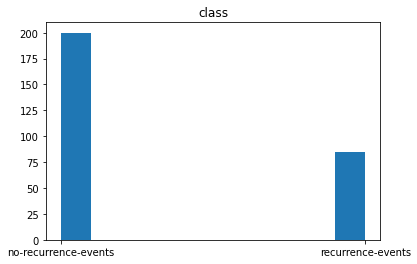

In [ ]:
plt.hist(data['class'])
plt.title('class')
plt.show()

In [ ]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no


In [ ]:
data['node-caps'].value_counts()

no     221
yes     56
?        8
Name: node-caps, dtype: int64

In [ ]:
data["node-caps"] = data['node-caps'].replace(to_replace='?', value='no')

In [ ]:
data['breast-quad'].value_counts()

left_low     109
left_up       97
right_up      33
right_low     24
central       21
?              1
Name: breast-quad, dtype: int64

In [ ]:
data["breast-quad"] = data['breast-quad'].replace(to_replace='?', value='left_low')

In [ ]:
data.drop_duplicates(subset=None, keep="first", inplace=False)

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
2,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
3,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no
4,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,left,left_low,no
...,...,...,...,...,...,...,...,...,...,...
280,recurrence-events,30-39,premeno,30-34,0-2,no,2,left,left_up,no
281,recurrence-events,30-39,premeno,20-24,0-2,no,3,left,left_up,yes
282,recurrence-events,60-69,ge40,20-24,0-2,no,1,right,left_up,no
283,recurrence-events,40-49,ge40,30-34,3-5,no,3,left,left_low,no


In [ ]:
class_map={"no-recurrence-events": 1, "recurrence-events":0}

data['class']=data['class'].map(class_map)

In [ ]:
age_map={"10-19":1, "20-29": 2, "30-39": 3,
        "40-49": 4, "50-59": 5,"60-69": 6,
        "70-79": 7, "80-89": 8,"90-99": 9 }
data['age']= data['age'].map(age_map)

In [ ]:
menop_map={"premeno": 1, "ge40": 2, "lt40": 3}
data['menopause']=data['menopause'].map(menop_map)

In [ ]:
tumor_map={"0-4":1, "5-9":2,"10-14":3, "15-19":4,"20-24":5, "25-29":6,
           "30-34":7, "35-39":8,"40-44":9,
           "45-49":10,"50-54":11, "55-59":12}
data['tumor-size']= data['tumor-size'].map(tumor_map)

In [ ]:
inv_map={"0-2":1, "3-5":2,"6-8":3, "9-11":4,
         "12-14":5, "15-17":6,"18-20":7,
         "21-23":8,"24-26":9, "27-29":10,
         "30-32":11, "33-35":12, "36-39":13}
data['inv-nodes']= data['inv-nodes'].map(inv_map)

In [ ]:
node_map={"yes": 1, "no": 0}
data['node-caps']=data['node-caps'].map(node_map)

In [ ]:
breast_map={"left": 0, "right": 1}
data['breast']=data['breast'].map(breast_map)

In [ ]:
quad_map={"left_up": 0, "left_low": 1, "right_up": 2,
          "right_low": 3, "central": 4}
data['breast-quad']=data['breast-quad'].map(quad_map)

In [ ]:
irr_map={"yes": 1, "no": 0}
data['irradiat']=data['irradiat'].map(irr_map)

In [ ]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,4,1,5,1,0,2,1,2,0
1,1,4,1,5,1,0,2,0,1,0
2,1,6,2,4,1,0,2,1,0,0
3,1,4,1,1,1,0,2,1,3,0
4,1,6,2,4,1,0,2,0,1,0


class
0    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
1    [[AxesSubplot(0.125,0.670278;0.215278x0.209722...
dtype: object

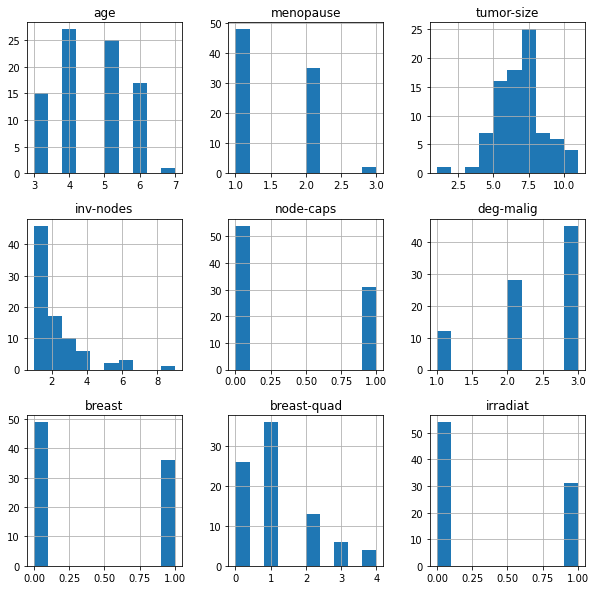

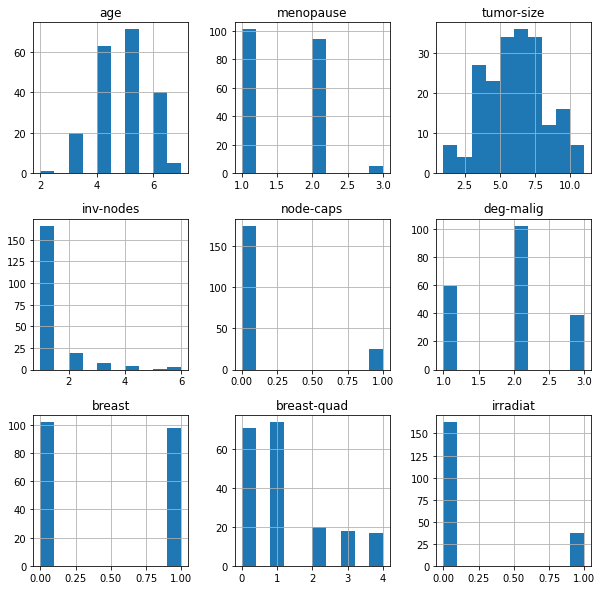

In [ ]:
data.groupby('class').hist(figsize=(10, 10))

In [ ]:
data.shape

(285, 10)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import svm, tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
X = data.drop('class', axis=1)
y=data['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=None)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier().fit(X_train,y_train)

print(f"Accuracy of Decision Tree classifier on training set:{ model.score(X_test,y_test)}")

Accuracy of Decision Tree classifier on training set:0.6527777777777778


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
print("Accuracy",accuracy_score(y_test,y_pred) )

Accuracy 0.6527777777777778


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conmat = confusion_matrix(y_test, y_pred)

In [ ]:
val = np.mat(conmat)

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames,

    )

print(df_cm)

    0   1
0   9  13
1  12  38


Text(0.5, 15.0, 'Predicted label')

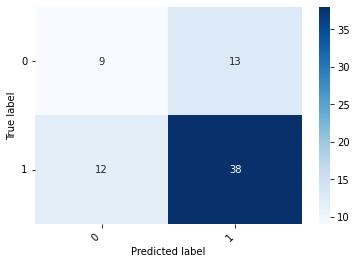

In [ ]:
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
model2 = KNeighborsClassifier().fit(X_train,y_train)
print(f"Accuracy of K-NN classifier on training set:{ model2.score(X_test,y_test)}")

Accuracy of K-NN classifier on training set:0.6666666666666666


In [ ]:
y_pred = model2.predict(X_test)

In [ ]:
conmat = confusion_matrix(y_test, y_pred)

In [ ]:
val = np.mat(conmat)

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames,

    )

print(df_cm)

   0   1
0  3  19
1  5  45


Text(0.5, 15.0, 'Predicted label')

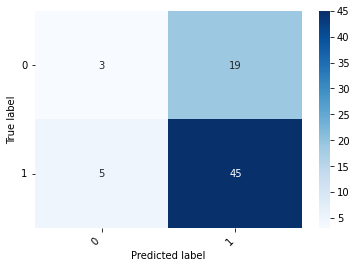

In [ ]:
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rand = RandomForestClassifier().fit(X_train,y_train)
print(f"Accuracy of Random forest classifier on training set:{ rand.score(X_test,y_test)}")

Accuracy of Random forest classifier on training set:0.7638888888888888


In [ ]:
y_pred = rand.predict(X_test)

In [ ]:
conmat = confusion_matrix(y_test, y_pred)

In [ ]:
val = np.mat(conmat)

classnames = list(set(y_train))

df_cm = pd.DataFrame(

        val, index=classnames, columns=classnames,

    )

print(df_cm)

   0   1
0  7  15
1  2  48


Text(0.5, 15.0, 'Predicted label')

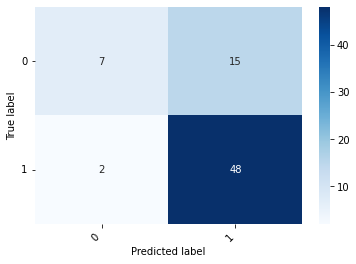

In [ ]:
plt.figure()

heatmap = sns.heatmap(df_cm, annot=True, cmap="Blues")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right')

heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right')

plt.ylabel('True label')

plt.xlabel('Predicted label')

In [ ]:
X_test.head()

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
255,4,1,7,1,0,1,0,1,1
38,4,1,7,1,0,1,0,1,0
168,4,2,7,1,0,2,0,0,1
234,5,1,6,2,1,3,0,1,1
208,4,1,8,1,0,1,1,0,0


In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,1,4,1,5,1,0,2,1,2,0
1,1,4,1,5,1,0,2,0,1,0
2,1,6,2,4,1,0,2,1,0,0
3,1,4,1,1,1,0,2,1,3,0
4,1,6,2,4,1,0,2,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
X = data.drop('class', axis=1)
X = StandardScaler().fit_transform(X)

In [ ]:
km = KMeans(n_clusters=2)
km_pred = km.fit_predict(X)

In [ ]:
print(km_pred)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1
 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 0 0 1 0 0 0
 1 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 0 1
 1 0 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1]


In [ ]:
import seaborn as sns
from sklearn.decomposition import PCA

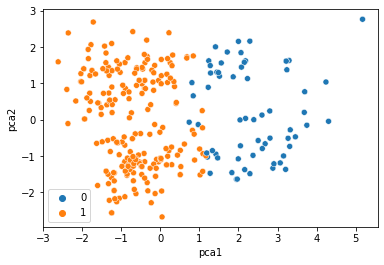

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=km_pred, data=results)
plt.show()

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
from sklearn.cluster import AgglomerativeClustering

In [ ]:
algo = AgglomerativeClustering(n_clusters=2)
algo_pred = algo.fit_predict(data)

In [ ]:
print(algo_pred)

[0 1 1 1 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1
 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 1 1
 1 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]


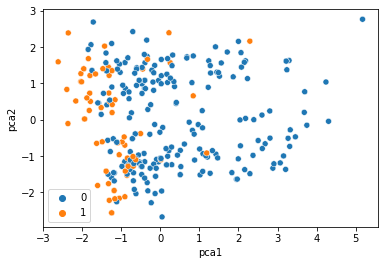

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=algo_pred, data=results)
plt.show()

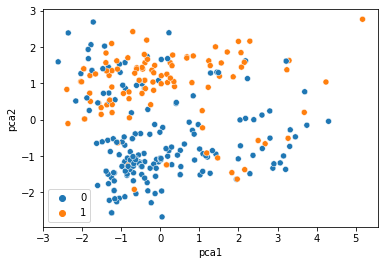

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=k_m_pred, data=results)
plt.show()

In [ ]:
from sklearn.cluster import Birch

In [ ]:
b = Birch(n_clusters=2)
b_pred = b.fit_predict(X)

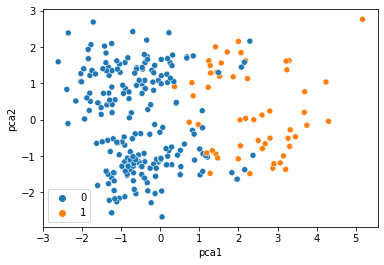

In [ ]:
reduced_data = PCA(n_components=2).fit_transform(X)
results = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
sns.scatterplot(x="pca1", y="pca2", hue=b_pred, data=results)
plt.show()